<a href="https://colab.research.google.com/github/DwinMarcel/DwinMarcel/blob/main/Taller_MBA_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA_MBA


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ejercicio 1: Cargar los datos y realizar un análisis descriptivo inicial

In [ ]:
# 1.Cargar el conjunto de datos:
# Usa pandas para cargar el archivo CSV y realiza una inspección inicial de las primeras filas del DataFrame.

from google.colab import drive
drive.mount('/gdrive')

ruta = "/gdrive/MyDrive/MBA.csv"
df = pd.read_csv(ruta)

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
df

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.00,3.00,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.00,5.00,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.00,5.00,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.00,6.00,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.00,5.00,Consulting,NaN
...,...,...,...,...,...,...,...,...,...,...
6189,6190,Male,False,3.49,Business,White,640.00,5.00,Other,NaN
6190,6191,Male,False,3.18,STEM,Black,670.00,4.00,Consulting,NaN
6191,6192,Female,True,3.22,Business,NaN,680.00,5.00,Health Care,Admit
6192,6193,Male,True,3.36,Business,NaN,590.00,5.00,Other,NaN


In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [ ]:
# 2.Análisis descriptivo inicial:
# Usa df.info() y df.describe() para obtener un resumen de los tipos de datos y las estadísticas generales del conjunto de datos (mediana, media, desviación estándar, etc.).

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


In [ ]:
df.describe()

,application_id,gpa,gmat,work_exp
count,6194.00,6194.00,6194.00,6194.00
mean,3097.50,3.25,651.09,5.02
std,1788.20,0.15,49.29,1.03
min,1.00,2.65,570.00,1.00
25%,1549.25,3.15,610.00,4.00
50%,3097.50,3.25,650.00,5.00
75%,4645.75,3.35,680.00,6.00
max,6194.00,3.77,780.00,9.00


# Ejercicio 2: Visualización de distribuciones

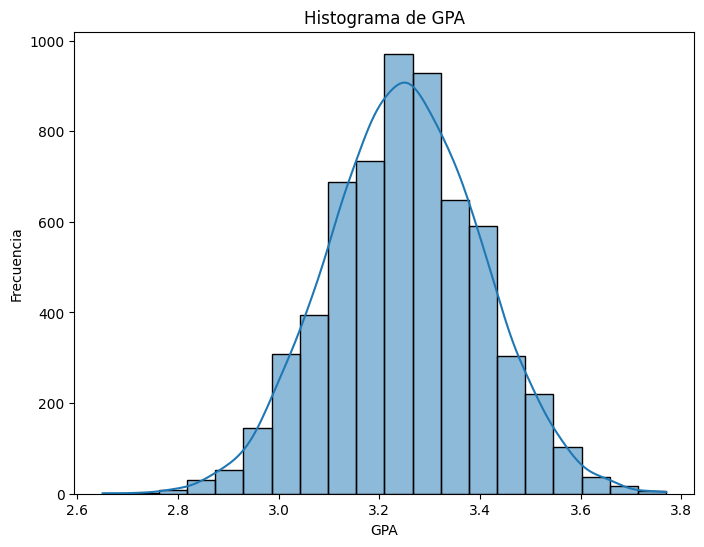

In [ ]:
# 1.Distribución de la variable 'gpa':
# Genera un histograma para visualizar la distribución del GPA de los solicitantes.

plt.figure(figsize=(8, 6))
sns.histplot(df['gpa'], bins=20, kde=True)
plt.title('Histograma de GPA')
plt.xlabel('GPA')
plt.ylabel('Frecuencia')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


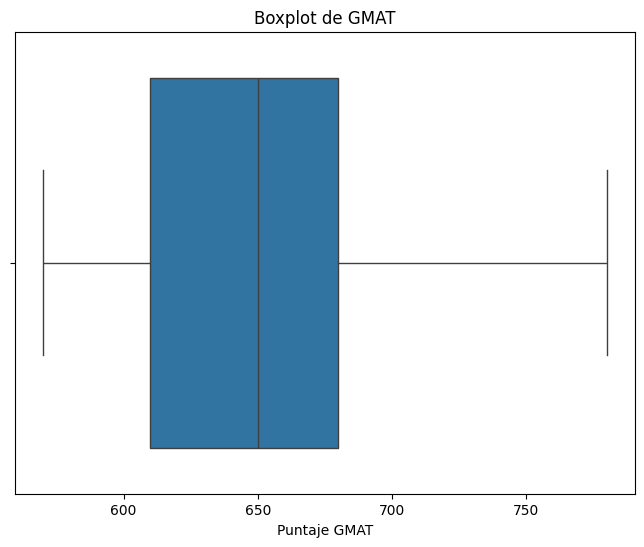

In [ ]:
# 2.Distribución de 'gmat':
# Crea un boxplot para visualizar la distribución del puntaje GMAT y detectar posibles outliers.

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['gmat'])
plt.title('Boxplot de GMAT')
plt.xlabel('Puntaje GMAT')
plt.show()


# Ejercicio 3: Análisis de valores faltantes y manejo de nulos

In [ ]:
# 1.Identificar valores faltantes:
# Usa isnull().sum() para identificar cuántos valores faltantes hay en cada columna.

df.isnull().sum()


,0
application_id,0
gender,0
international,0
gpa,0
major,0
race,1842
gmat,0
work_exp,0
work_industry,0
admission,5194


In [ ]:
# 2.Manejo de valores nulos:
# Para la columna 'race' (donde los estudiantes internacionales pueden tener valores nulos), reemplaza los valores nulos por 'International'.

df['race'] = df['race'].fillna('International')


In [ ]:
# 3.Reemplazar nulos en 'gmat' con 0:
# Si algunos solicitantes no tienen un puntaje "gmat", reemplázalo con 0 para aquellos casos.

df['gmat'] = df['gmat'].fillna(0)


In [ ]:
# 4.Remplazar nulos en columna 'admision'.
# Se remplaza valores nulos por 'Deny' segun especificaciones del metadata, en la columna 'admission' (No especificado en el ejercicio).

df['admission'] = df['admission'].fillna('Deny')

In [ ]:
df

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.00,3.00,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.00,5.00,Investment Management,Deny
2,3,Female,True,3.30,Business,International,710.00,5.00,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.00,6.00,Technology,Deny
4,5,Male,False,3.35,STEM,Hispanic,590.00,5.00,Consulting,Deny
...,...,...,...,...,...,...,...,...,...,...
6189,6190,Male,False,3.49,Business,White,640.00,5.00,Other,Deny
6190,6191,Male,False,3.18,STEM,Black,670.00,4.00,Consulting,Deny
6191,6192,Female,True,3.22,Business,International,680.00,5.00,Health Care,Admit
6192,6193,Male,True,3.36,Business,International,590.00,5.00,Other,Deny


# Ejercicio 4: Visualización de relaciones entre variables

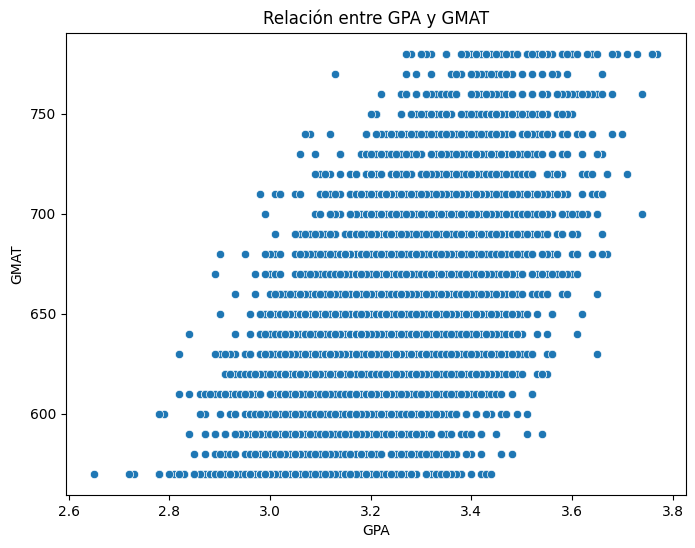

In [ ]:
# 1.Relación entre GPA y GMAT:
# Crea un gráfico de dispersión para ver la relación entre el "gpa" y el "gmat" de los solicitantes.

plt.figure(figsize=(8, 6))
sns.scatterplot(x='gpa', y='gmat', data=df)
plt.title('Relación entre GPA y GMAT')
plt.xlabel('GPA')
plt.ylabel('GMAT')
plt.show()


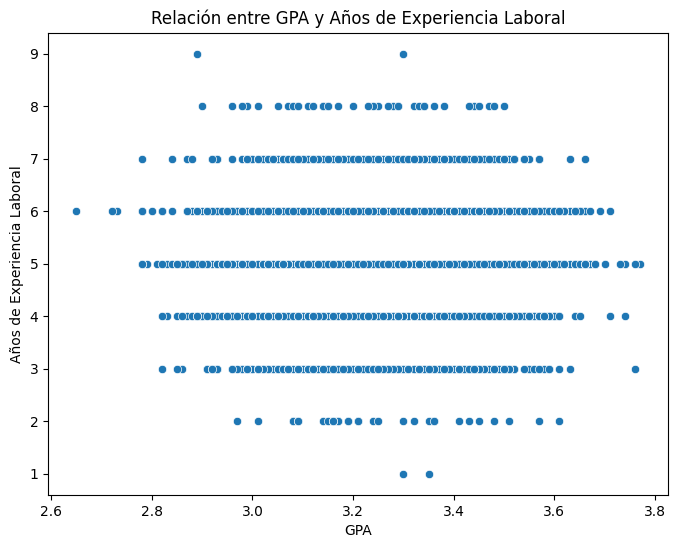

In [ ]:
# 2.Relación entre GPA y experiencia laboral:
# Visualiza si existe una relación entre el promedio "gpa"  y los años de experiencia laboral (work_exp) mediante un gráfico de dispersión.

plt.figure(figsize=(8, 6))
sns.scatterplot(x='gpa', y='work_exp', data=df)
plt.title('Relación entre GPA y Años de Experiencia Laboral')
plt.xlabel('GPA')
plt.ylabel('Años de Experiencia Laboral')
plt.show()


# Ejercicio 5: Análisis categórico

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


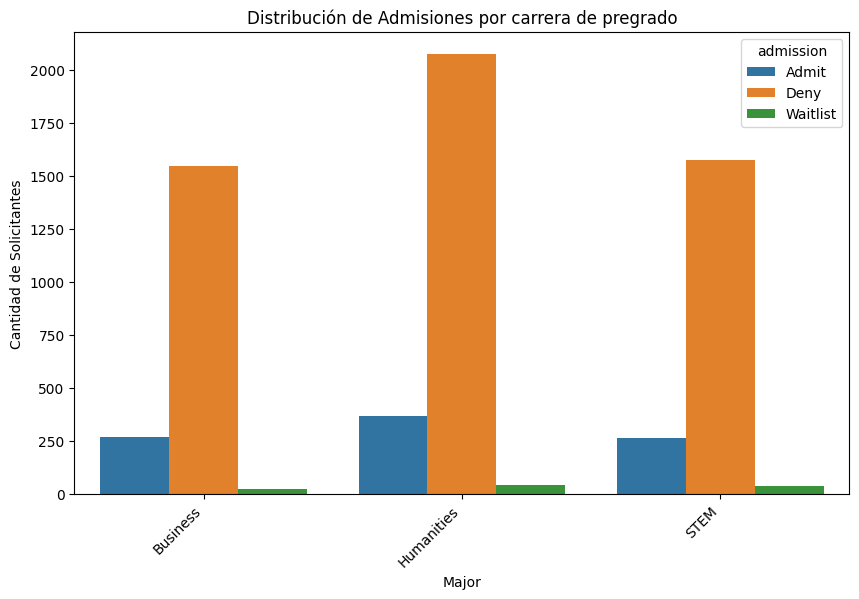

In [ ]:
# 1.Distribución de "admission" por "major":
# Crea un gráfico de barras para ver cómo se distribuyen las admisiones en función de la carrera de pregrado (major)..

plt.figure(figsize=(10, 6))
sns.countplot(x='major', hue='admission', data=df)
plt.title('Distribución de Admisiones por carrera de pregrado')
plt.xlabel('Major')
plt.ylabel('Cantidad de Solicitantes')
plt.xticks(rotation=45, ha='right')
plt.show()


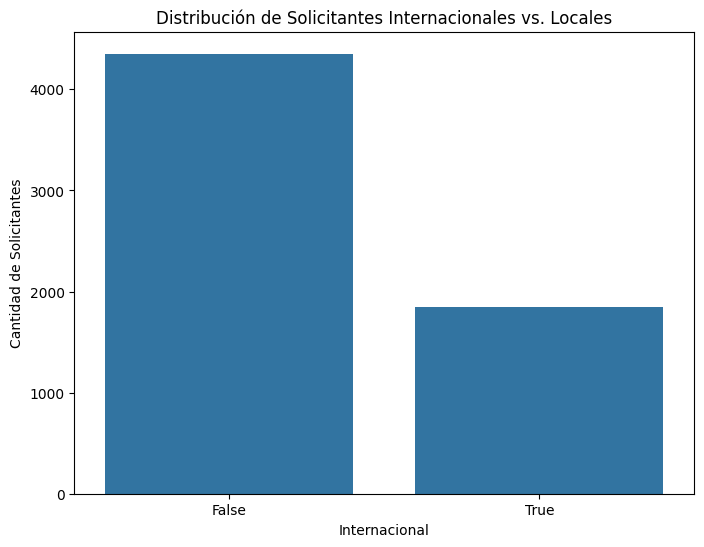

In [ ]:
# 2.Distribución de solicitantes internacionales:
# Crea un gráfico de barras para visualizar cuántos solicitantes son internacionales o locales (international).

plt.figure(figsize=(8, 6))
sns.countplot(x='international', data=df)
plt.title('Distribución de Solicitantes Internacionales vs. Locales')
plt.xlabel('Internacional')
plt.ylabel('Cantidad de Solicitantes')
plt.show()


# Ejercicio 6: Detección y manejo de outliers

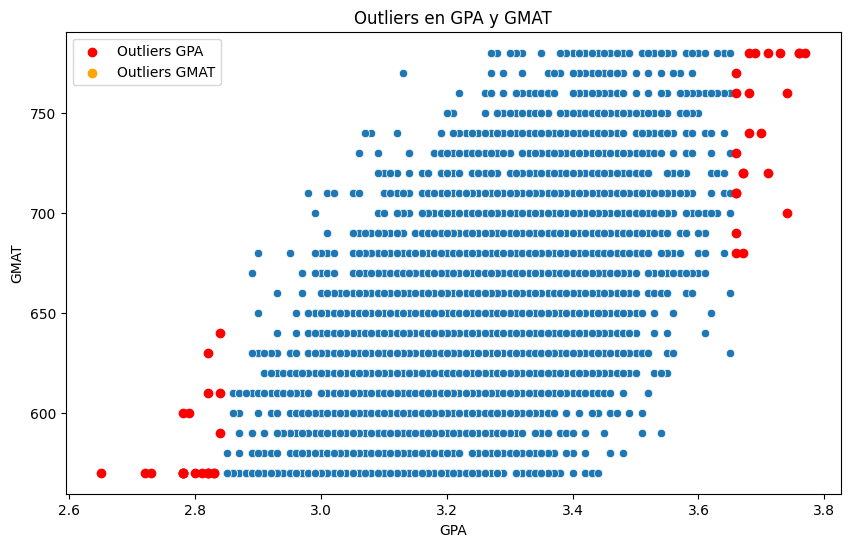

In [ ]:
# 1.Detección de outliers en GPA y GMAT:
# Usa el método del rango intercuartílico (IQR) para detectar y eliminar outliers de las columnas 'gpa' y 'gmat'.

# Calcular el IQR para 'gpa' y 'gmat'
Q1_gpa = df['gpa'].quantile(0.25)
Q3_gpa = df['gpa'].quantile(0.75)
IQR_gpa = Q3_gpa - Q1_gpa

Q1_gmat = df['gmat'].quantile(0.25)
Q3_gmat = df['gmat'].quantile(0.75)
IQR_gmat = Q3_gmat - Q1_gmat

# Definir los límites superior e inferior para identificar outliers
lower_bound_gpa = Q1_gpa - 1.5 * IQR_gpa
upper_bound_gpa = Q3_gpa + 1.5 * IQR_gpa

lower_bound_gmat = Q1_gmat - 1.5 * IQR_gmat
upper_bound_gmat = Q3_gmat + 1.5 * IQR_gmat


# Identificar los outliers
outliers_gpa = df[(df['gpa'] < lower_bound_gpa) | (df['gpa'] > upper_bound_gpa)]
outliers_gmat = df[(df['gmat'] < lower_bound_gmat) | (df['gmat'] > upper_bound_gmat)]

# Crear un gráfico de dispersión para visualizar los outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='gpa', y='gmat', data=df)
plt.scatter(outliers_gpa['gpa'], outliers_gpa['gmat'], color='red', label='Outliers GPA')
plt.scatter(outliers_gmat['gpa'], outliers_gmat['gmat'], color='orange', label='Outliers GMAT')

plt.title('Outliers en GPA y GMAT')
plt.xlabel('GPA')
plt.ylabel('GMAT')
plt.legend()
plt.show()


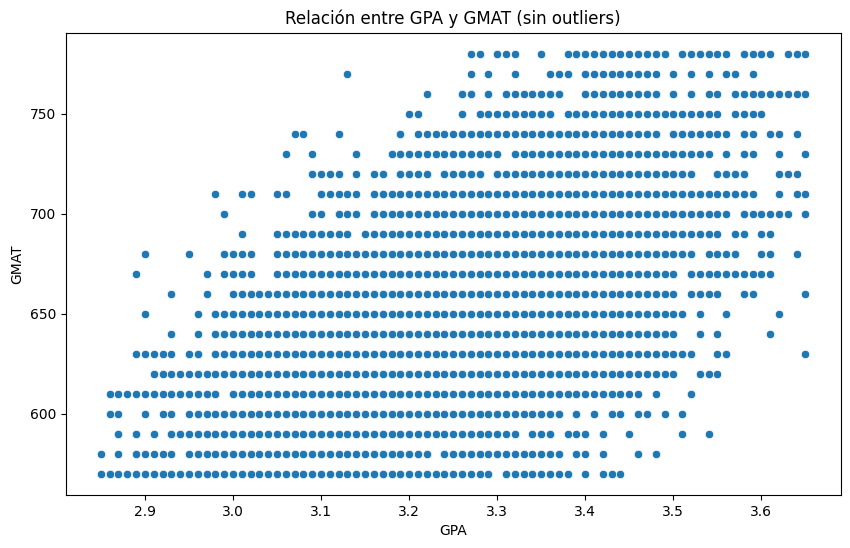

In [ ]:
# 2.Eliminacion de outliers en GPA y GMAT:

df_no_outliers = df[(df['gpa'] >= lower_bound_gpa) & (df['gpa'] <= upper_bound_gpa) &
                   (df['gmat'] >= lower_bound_gmat) & (df['gmat'] <= upper_bound_gmat)]

# Crear un gráfico de dispersión para visualizar que ya no hay outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='gpa', y='gmat', data=df_no_outliers)
plt.title('Relación entre GPA y GMAT (sin outliers)')
plt.xlabel('GPA')
plt.ylabel('GMAT')
plt.show()


# Ejercicio 7: Reorganizar columnas

In [ ]:
# Mover la columna 'admission' al inicio del DataFrame.
# Reorganiza el orden de las columnas para que 'admission' sea la primera columna del DataFrame.

cols = list(df_no_outliers.columns)
cols.insert(0, cols.pop(cols.index('admission')))
df_no_outliers = df_no_outliers.loc[:, cols]
df_no_outliers



,admission,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry
0,Admit,1,Female,False,3.30,Business,Asian,620.00,3.00,Financial Services
1,Deny,2,Male,False,3.28,Humanities,Black,680.00,5.00,Investment Management
2,Admit,3,Female,True,3.30,Business,International,710.00,5.00,Technology
3,Deny,4,Male,False,3.47,STEM,Black,690.00,6.00,Technology
4,Deny,5,Male,False,3.35,STEM,Hispanic,590.00,5.00,Consulting
...,...,...,...,...,...,...,...,...,...,...
6189,Deny,6190,Male,False,3.49,Business,White,640.00,5.00,Other
6190,Deny,6191,Male,False,3.18,STEM,Black,670.00,4.00,Consulting
6191,Admit,6192,Female,True,3.22,Business,International,680.00,5.00,Health Care
6192,Deny,6193,Male,True,3.36,Business,International,590.00,5.00,Other


# Ejercicio 8: Escriba las conclusiones del DataSet

In [ ]:
# Ejercicio 1: Carga y Análisis Descriptivo Inicial
"""
El conjunto de datos contiene información de solicitantes a un programa MBA, incluyendo variables como GPA, GMAT, experiencia laboral, carrera de pregrado, etc.
Se pudo observar que existen variables numéricas (como gpa y gmat) y categóricas (como admission, major, race).
El análisis descriptivo nos proporcionó información general como media, desviación estándar, mínimo, máximo, etc. para cada variable numérica.
"""

# Ejercicio 2: Visualización de Distribuciones
"""
- El GPA de los solicitantes tiene una distribución aproximadamente normal con una ligera asimetría hacia la izquierda.
- El puntaje GMAT también presenta una distribución aproximadamente normal, con posibles outliers en los valores más altos.
"""

# Ejercicio 3: Análisis de Valores Faltantes y Manejo de Nulos
"""
- Se identificaron valores faltantes en varias columnas.
- Los valores faltantes en la columna 'race' se reemplazaron con 'International', asumiendo que los estudiantes sin raza especificada son internacionales.
- Los valores faltantes en la columna 'gmat' se reemplazaron con 0, suponiendo que no tenían puntaje GMAT, pero al parecer no existian valores faltantes.
- Los valores faltantes en la columna 'admission' se reemplazaron con 'Deny', intuitivamente de acuerdo a la descripción del metadata, ya que en el ejercicio no se especifica.
"""

# Ejercicio 4: Visualización de Relaciones entre Variables
"""
- Se observó una correlación positiva entre GPA y GMAT, lo que sugiere que los estudiantes con mejor GPA tienden a tener mejores puntajes GMAT.
- No se observó una relación clara entre GPA y experiencia laboral.
"""

# Ejercicio 5: Análisis Categórico
"""
- La mayoría de los solicitantes provienen de las carreras de ingeniería y negocios.
- La distribución de las admisiones parece ser similar entre las diferentes carreras de pregrado.
- Se observó que la cantidad de estudiantes internacionales es menor que la de los estudiantes locales, ya que son mayores los valores 'false' que los valores 'true'.
- la cantidad de denegacion para la carrera de pregrado es 4 0 5 veces mas alta en comparacion a los admitidos, sobre todo en Humanities.
"""

# Ejercicio 6: Detección y Manejo de Outliers
"""
- Se detectaron outliers en las variables 'gpa' y 'gmat' utilizando el método IQR.
- Se eliminaron los outliers para evitar que distorsionen los análisis posteriores.
"""

# Ejercicio 7: Reorganizar Columnas
"""
- La columna 'admission' se movió al inicio del DataFrame para una mejor organización y facilitar el análisis.
"""

# Conclusiones Generales
"""
- El GPA y el GMAT son variables importantes para determinar la admisión a un programa MBA.
- La carrera de pregrado y el origen del solicitante (nacional o internacional) también pueden tener cierta influencia en la admisión.
- Se logró limpiar el conjunto de datos eliminando outliers y lidiando con los valores faltantes.
- El conjunto de datos proporciona una base para construir modelos predictivos que permitan predecir la probabilidad de admisión en base a las características de cada solicitante.
"""
